# Using LangGraph API

We can connect to our data enrichment agent using the LangGraph API.

The LangGraph API serves as the back-end for LangGraph Studio.

The Studio UI provides a URL (lower left corner) that we can use to connect to the API using the LangGraph SDK. 

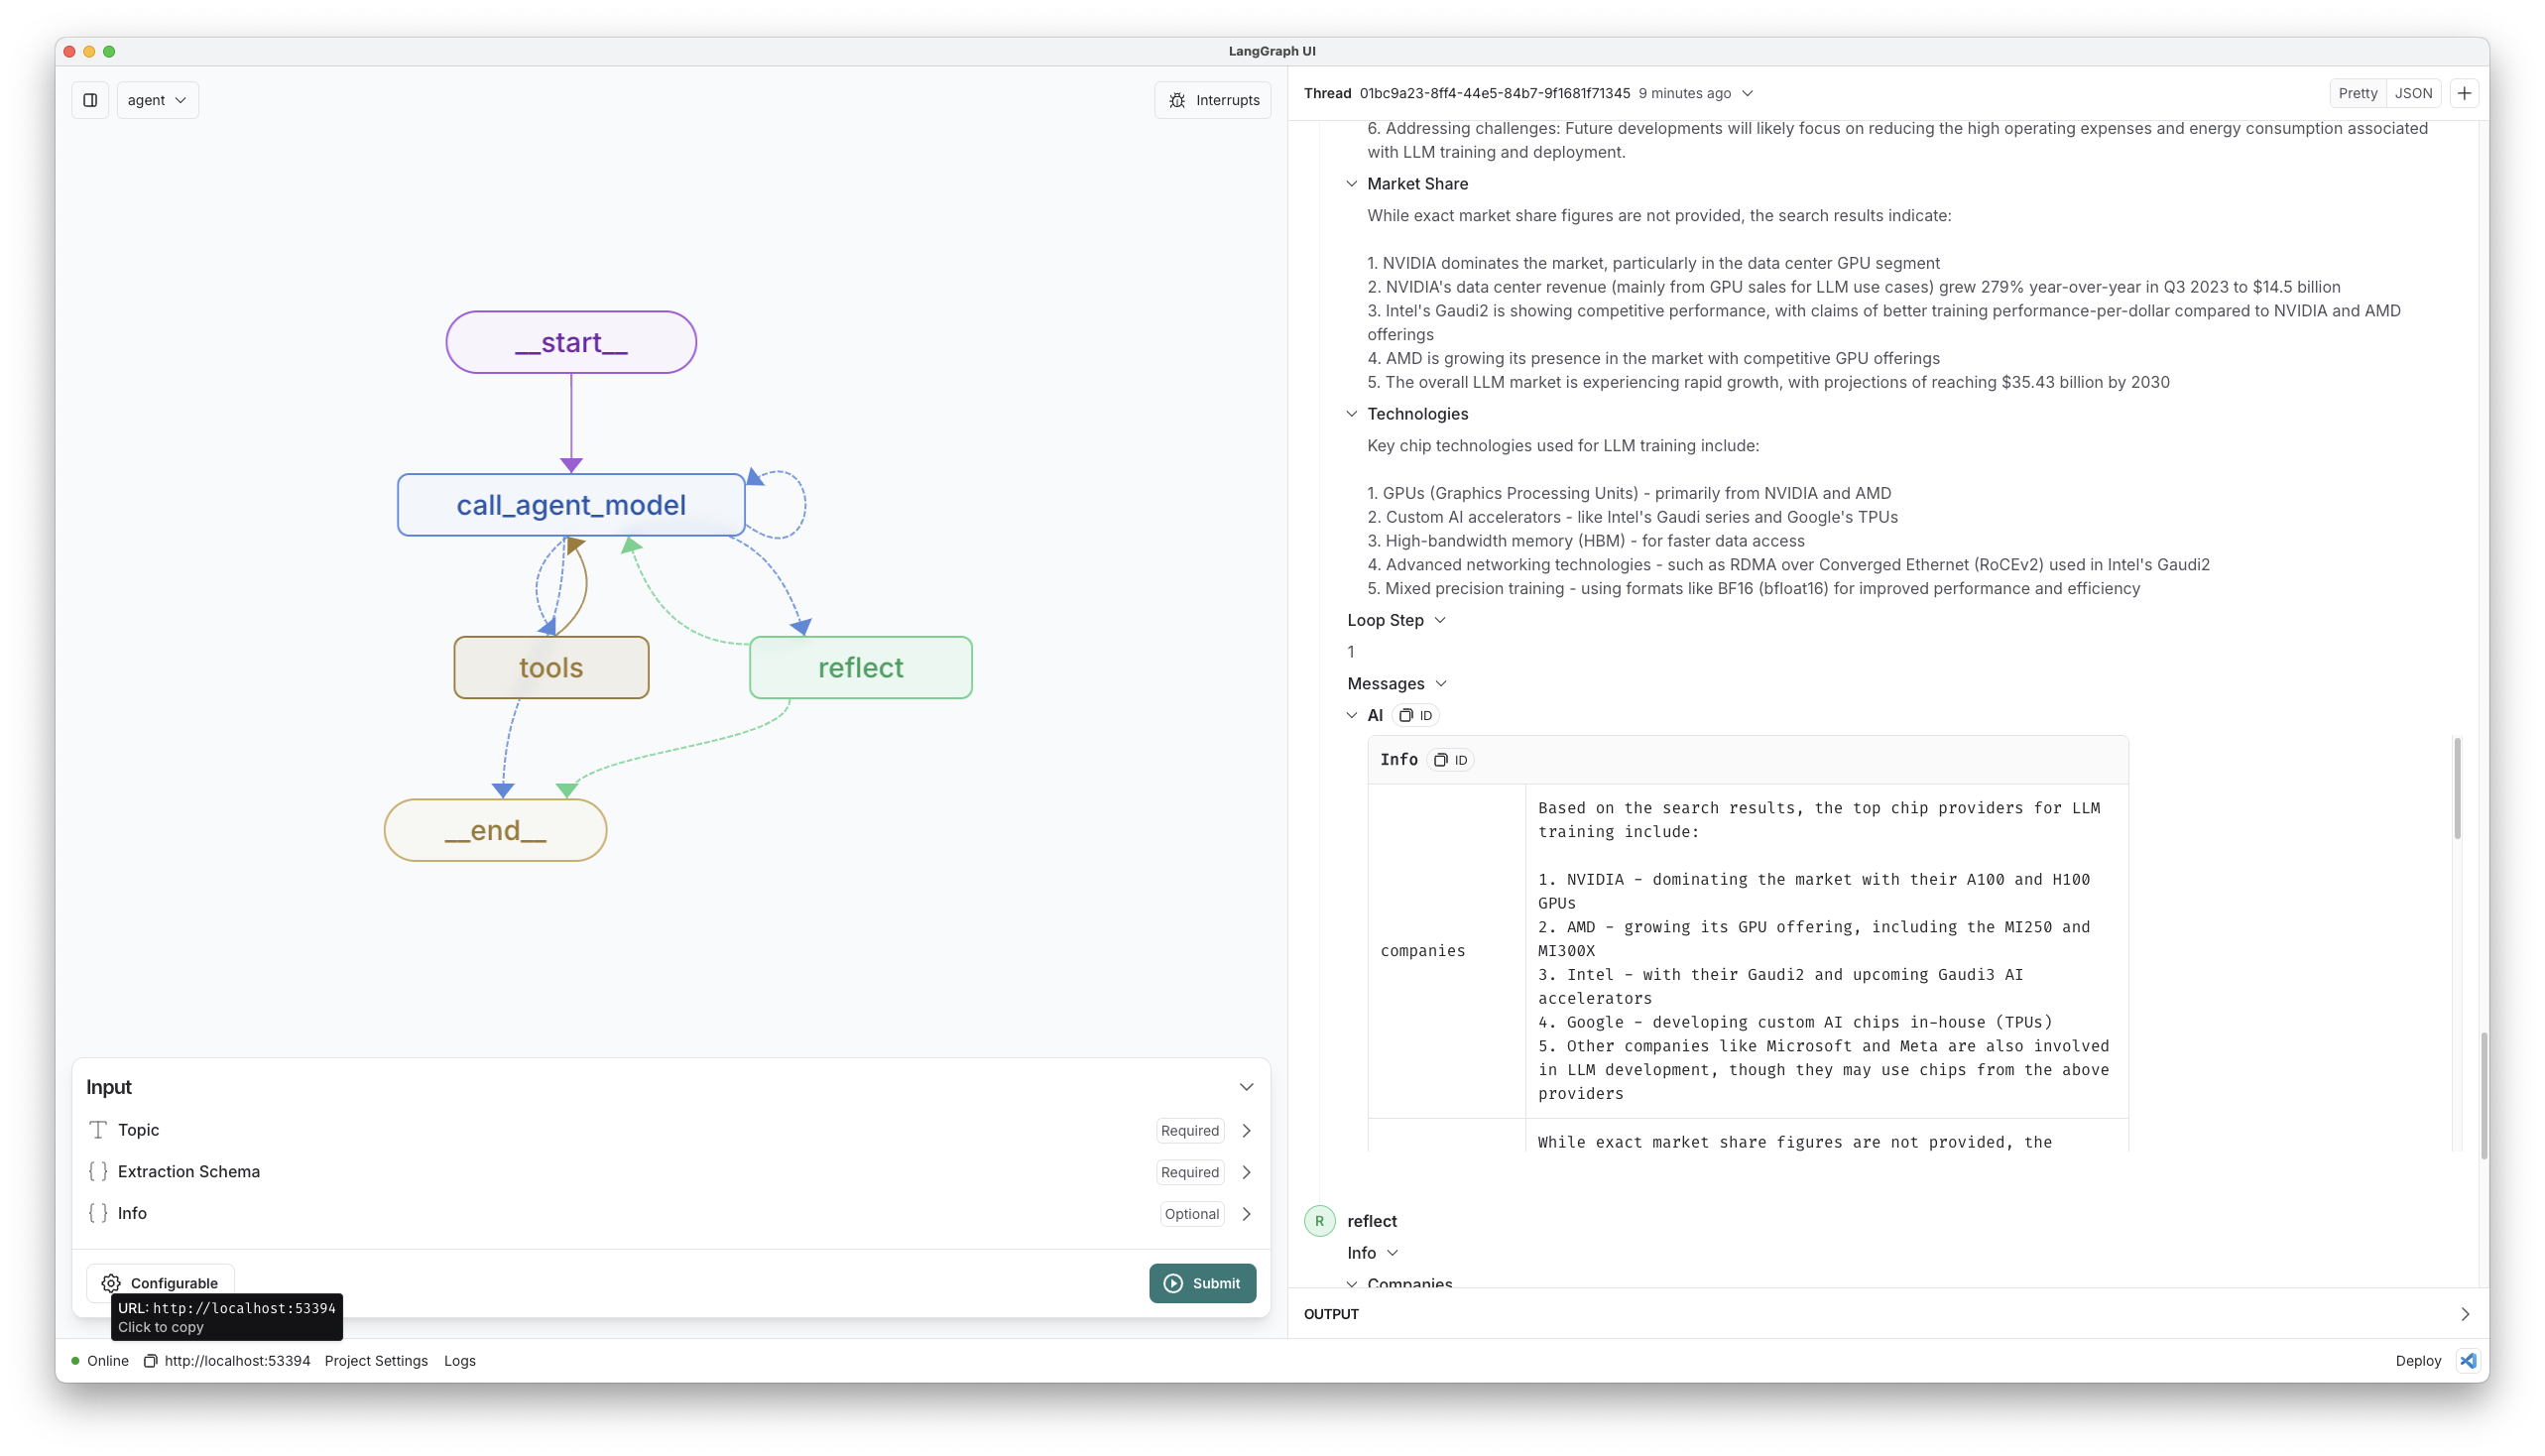

In [ ]:
%%capture --no-stderr
%pip install --quiet -U langchain_core langgraph_sdk

In [1]:
from langgraph_sdk import get_client

client = get_client(url="http://localhost:56396")

In [2]:
topic = "Top 5 chip providers for LLM Training"

In [3]:
schema = {
    "type": "object",
    "properties": {
        "companies": {
            "type": "array",
            "items": {
                "type": "object",
                "properties": {
                    "name": {"type": "string", "description": "Company name"},
                    "technologies": {
                        "type": "string",
                        "description": "Brief summary of key technologies used by the company",
                    },
                    "market_share": {
                        "type": "string",
                        "description": "Overview of market share for this company",
                    },
                    "future_outlook": {
                        "type": "string",
                        "description": "Brief summary of future prospects and developments in the field for this company",
                    },
                    "key_powers": {
                        "type": "string",
                        "description": "Which of the 7 Powers (Scale Economies, Network Economies, Counter Positioning, Switching Costs, Branding, Cornered Resource, Process Power) best describe this company's competitive advantage",
                    },
                },
                "required": ["name", "technologies", "market_share", "future_outlook"],
            },
            "description": "List of companies",
        }
    },
    "required": ["companies"],
}

Note that we can pass any configuration parameters in [configuration.py](../src/enrichment_agent/configuration.py) via `configurable` key in the input.

In [ ]:
from langchain_core.messages import convert_to_messages

# Thread
thread = await client.threads.create()

# Model
llm = "anthropic/claude-3-5-sonnet-20240620"
llm = "openai/gpt-4o"

# Stream
async for event in client.runs.stream(
    thread["thread_id"],
    assistant_id="agent",
    input={
        "topic": topic,
        "extraction_schema": schema,
        "configurable": {"model_name": llm},
    },
    stream_mode="values",
):
    messages = event.data.get("messages", None)
    if messages:
        print(convert_to_messages(messages)[-1])
    print("=" * 25)

In [5]:
current_state = await client.threads.get_state(thread["thread_id"])

In [8]:
from IPython.display import Markdown, display


def format_llm_chip_info(data):
    markdown_text = "# Top 5 Chip Providers for LLM Training\n\n"

    for company in data["companies"]:
        markdown_text += f"""
## {company['name']}

**Key Technologies:** {company['technologies']}

**Market Share:** {company['market_share']}

**Key Powers:** {company.get('key_powers', 'Not specified')}

**Future Outlook:** {company['future_outlook']}

---
"""

    return Markdown(markdown_text)


# Display the formatted markdown
display(format_llm_chip_info(current_state["values"]["info"]))

# Top 5 Chip Providers for LLM Training


## NVIDIA

**Key Technologies:** GPU accelerators (A100, H100, GH200, Blackwell B200)

**Market Share:** Over 80% of the high-end AI chip market

**Key Powers:** Scale Economies, Network Economies, Branding

**Future Outlook:** Strong growth potential with continued innovation in AI-specific hardware, including the recently announced Blackwell B200 GPU

---

## AMD

**Key Technologies:** MI250 and MI300X GPUs

**Market Share:** Growing presence in AI chip market, with performance reportedly close to NVIDIA in some benchmarks

**Key Powers:** Scale Economies, Counter Positioning

**Future Outlook:** Accelerating roadmap development to compete in the AI market, potential for significant growth

---

## Intel

**Key Technologies:** Gaudi2 and upcoming Gaudi3 AI accelerators

**Market Share:** Emerging player in AI chip market, with Gaudi3 potentially competitive with NVIDIA's H100

**Key Powers:** Scale Economies, Process Power

**Future Outlook:** Promising outlook with Gaudi3 chips, aiming to offer performance comparable to NVIDIA's offerings at a potentially lower cost

---

## Google

**Key Technologies:** Tensor Processing Units (TPUs) v4 and v5e

**Market Share:** Significant player for in-house use and Google Cloud customers

**Key Powers:** Network Economies, Process Power, Scale Economies

**Future Outlook:** Continued development of TPUs with v5e offering up to 4x greater performance per dollar for inference compared to alternatives

---

## Groq

**Key Technologies:** Language Processing Unit (LPU) Inference Engine

**Market Share:** Emerging player focusing on inference, gaining attention for high-speed performance

**Key Powers:** Counter Positioning, Process Power

**Future Outlook:** Potential for rapid adoption among startups due to speed and cost-effectiveness in LLM inference, claiming to serve Mixtral at nearly 500 tokens/second

---


The LangGraph API allows us to interact with the agent in a programmatic way.

It has many capabilities, including as shown [here](https://langchain-ai.github.io/langgraph/cloud/concepts/api/), which include [cron-jobs](https://langchain-ai.github.io/langgraph/cloud/concepts/api/#cron-jobs).

So, the agent could be run on a schedule or even hosted via [LangGraph cloud](https://langchain-ai.github.io/langgraph/cloud#overview).                                                                                                 